<a href="https://colab.research.google.com/github/isi1993/DRRR/blob/main/MY_PORFORLIO_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LOAD THE REQUIRED LIBRARIES

In [ ]:
#load the required python library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

LOAD THE DATASET

In [ ]:
#read the  Transactiondata using jupyternote
Data_DF = pd.read_csv("/content/QVI_transaction_data.csv")
Data_DF.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


CHEACK FOR COLUMN NAMES

In [ ]:
Data_DF.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

STANDARDDISE THE VARIOUS COLUMN NAMES

In [ ]:
column_synonyms = {
    'DATE': 'Transaction_Date',
    'STORE_NBR': 'Store_Number',
    'LYLTY_CARD_NBR': 'Loyalty_Card_Number',
    'TXN_ID': 'Transaction_ID',
    'PROD_NBR': 'Product_Number',
    'PROD_NAME': 'Product_Description',
    'PROD_QTY': 'Sales_Quantity',
    'TOT_SALES': 'Total_Sales',
    'PACK_SIZE': 'Package_Size_g',
    'BRAND': 'Brand_Name',
    'LIFESTAGE': 'Customer_Lifestage',
    'PREMIUM_CUSTOMER': 'Customer_Segment_Type',
    'price': 'Unit_Price'
}

# Example of how to use this mapping in your Python code:
Data_DF.rename(columns=column_synonyms, inplace=True)

In [ ]:
Data_DF.columns

Index(['Transaction_Date', 'Store_Number', 'Loyalty_Card_Number',
       'Transaction_ID', 'Product_Number', 'Product_Description',
       'Sales_Quantity', 'Total_Sales'],
      dtype='object')

# create the unit price column

In [ ]:

Data_DF["unit_price"] = Data_DF["Total_Sales"] / Data_DF["Sales_Quantity"]


CHEACK FOR THE HEAD FUNCCTION

In [ ]:

Data_DF.head(10)

,Transaction_Date,Store_Number,Loyalty_Card_Number,Transaction_ID,Product_Number,Product_Description,Sales_Quantity,Total_Sales,unit_price
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.00
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2.10
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1.45
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,3.00
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,4.60
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1,5.10
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7,5.70
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,3.60
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9,3.90
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,3.60


HIGHLIGHT THE DATA SHAPE

In [ ]:

Data_DF.shape

(264836, 9)

USE THE INFO FUNCTION TO UNDERSTAND THE DATASET BETTER

In [ ]:

Data_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Transaction_Date     264836 non-null  int64  
 1   Store_Number         264836 non-null  int64  
 2   Loyalty_Card_Number  264836 non-null  int64  
 3   Transaction_ID       264836 non-null  int64  
 4   Product_Number       264836 non-null  int64  
 5   Product_Description  264836 non-null  object 
 6   Sales_Quantity       264836 non-null  int64  
 7   Total_Sales          264836 non-null  float64
 8   unit_price           264836 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 18.2+ MB


CHEACK FOR DATA TYPE

In [ ]:

Data_DF.dtypes

,0
Transaction_Date,int64
Store_Number,int64
Loyalty_Card_Number,int64
Transaction_ID,int64
Product_Number,int64
Product_Description,object
Sales_Quantity,int64
Total_Sales,float64
unit_price,float64


# converting the numeric date columns into **datetime**

In [ ]:
#convert the date column from numeric to datetime
Data_DF['Transaction_Date'] = pd.to_datetime(Data_DF['Transaction_Date'], unit='D', origin='1899-12-30')
Data_DF

,Transaction_Date,Store_Number,Loyalty_Card_Number,Transaction_ID,Product_Number,Product_Description,Sales_Quantity,Total_Sales,unit_price
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,4.60
...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,5.40
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,4.40
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,4.40
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,3.90


In [ ]:
Data_DF.columns

Index(['Transaction_Date', 'Store_Number', 'Loyalty_Card_Number',
       'Transaction_ID', 'Product_Number', 'Product_Description',
       'Sales_Quantity', 'Total_Sales', 'unit_price'],
      dtype='object')

CHECK FOR MISSING VALUES

In [ ]:
Data_DF.isnull().sum()

,0
Transaction_Date,0
Store_Number,0
Loyalty_Card_Number,0
Transaction_ID,0
Product_Number,0
Product_Description,0
Sales_Quantity,0
Total_Sales,0
unit_price,0


check for duplicate values

In [ ]:
Data_DF.duplicated().sum()

np.int64(1)

In [ ]:
Data_DF.drop_duplicates(inplace=True)

In [ ]:
Data_DF.columns

Index(['Transaction_Date', 'Store_Number', 'Loyalty_Card_Number',
       'Transaction_ID', 'Product_Number', 'Product_Description',
       'Sales_Quantity', 'Total_Sales', 'unit_price'],
      dtype='object')

In [ ]:
Data_DF['Product_Description'].value_counts()

,count
Product_Description,
Kettle Mozzarella Basil & Pesto 175g,3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3269
Tyrrells Crisps Ched & Chives 165g,3268
Cobs Popd Sea Salt Chips 110g,3265
...,...
RRD Pc Sea Salt 165g,1431
Woolworths Medium Salsa 300g,1430
NCC Sour Cream & Garden Chives 175g,1419


# removing all special characters from the prod_name columns

In [ ]:
#Removing special characters Let's look at the most common words by counting the number of times a word appears

#### and sorting them by this frequency in order of highest to lowest frequency
Product_Description = Data_DF['Product_Description'].astype(str)
all_words = (
       Product_Description
     .str.upper()
     .str.replace(r"[^a-z0-9\s]", "", regex=True)
     .str.split()
     .explode()
)
word_counts = all_words.value_counts().reset_index()
word_counts.columns =["Word", "Frequency"]
#freq_dict = word_counts.set_index('Word')
print("\nTop 50 most common words in Product_Description:")
print(word_counts.head(20))


Top 50 most common words in Product_Description:
   Word  Frequency
0   175      66389
1   150      43131
2   134      25102
3   110      22387
4   170      19983
5   165      15297
6   300      15166
7   330      12540
8   380       6418
9   270       6285
10  210       6272
11  200       4473
12  135       3257
13  250       3169
14   90       3008
15  190       2995
16  160       2970
17  220       1564
18   70       1507
19  180       1468


In [ ]:
Data_DF.columns

Index(['Transaction_Date', 'Store_Number', 'Loyalty_Card_Number',
       'Transaction_ID', 'Product_Number', 'Product_Description',
       'Sales_Quantity', 'Total_Sales', 'unit_price'],
      dtype='object')

In [ ]:
# CHECK FOR number of stores in the dataset
Data_DF['Store_Number'].unique()

array([  1,   2,   4,   5,   7,   8,   9,  13,  19,  20,  22,  23,  25,
        33,  36,  38,  39,  41,  43,  45,  51,  54,  55,  56,  58,  59,
        60,  62,  63,  67,  71,  72,  74,  75,  80,  81,  82,  83,  84,
        88,  94,  96,  97, 101, 102, 104, 106, 109, 110, 111, 112, 114,
       115, 116, 118, 119, 120, 122, 125, 128, 129, 130, 133, 149, 151,
       152, 153, 156, 157, 160, 161, 164, 166, 167, 168, 169, 172, 173,
       175, 178, 181, 184, 186, 187, 191, 194, 196, 197, 200, 205, 207,
       208, 209, 212, 214, 215, 216, 217, 219, 222, 223, 225, 226, 227,
       235, 236, 237, 241, 243, 246, 247, 248, 250, 253, 255, 256, 257,
       262, 265, 266, 269, 271,  77,   3,   6,  10,  12,  15,  16,  17,
        18,  21,  24,  26,  27,  28,  29,  30,  32,  34,  35,  37,  40,
        46,  47,  48,  49,  50,  52,  53,  57,  61,  64,  65,  66,  68,
        69,  70,  73,  78,  79,  86,  87,  89,  90,  91,  93,  95,  98,
       100, 103, 105, 107, 108, 113, 117, 121, 123, 124, 126, 12

In [ ]:
# COUNT THE NUMBER OF STORES that THE RETAIL BUSINESS operates
Data_DF['Store_Number'].nunique()

272

In [ ]:
Data_DF.columns

Index(['Transaction_Date', 'Store_Number', 'Loyalty_Card_Number',
       'Transaction_ID', 'Product_Number', 'Product_Description',
       'Sales_Quantity', 'Total_Sales', 'unit_price'],
      dtype='object')

In [ ]:
# COUNT THE of Product_Number The  Retail business have in their product line
Data_DF['Product_Number'].nunique()

114

In [ ]:
# COUNT THE NUMBER OF Product Number  THE RETAIL BUSINESS operate with
Data_DF['Product_Number'].value_counts()

,count
Product_Number,
102,3304
108,3296
33,3269
112,3268
75,3265
...,...
11,1431
76,1430
98,1419


In [ ]:
# cheack the number of transaction id
Data_DF['Transaction_ID'].nunique()

263127

In [ ]:
#Remove special character like &
Data_DF = Data_DF
Data_DF['Production_Description'] = Data_DF['Product_Description'].astype(str).str.replace('&', '',
regex=False)

In [ ]:
Data_DF['Production_Description'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/CreamOnion 175g',
       'Kettle Tortilla ChpsHnyJlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt  Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    CreamChives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream     Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'Kettle 

In [ ]:
Data_DF['Product_Description'] = Data_DF['Product_Description'].str.replace('/', '', regex=False)

In [ ]:
Data_DF['Product_Description'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  SCream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'Ke

check for outliers in the Product_Description columns

In [ ]:
Data_DF.columns

Index(['Transaction_Date', 'Store_Number', 'Loyalty_Card_Number',
       'Transaction_ID', 'Product_Number', 'Product_Description',
       'Sales_Quantity', 'Total_Sales', 'unit_price',
       'Production_Description'],
      dtype='object')

In [ ]:
Data_DF.columns

Index(['Transaction_Date', 'Store_Number', 'Loyalty_Card_Number',
       'Transaction_ID', 'Product_Number', 'Product_Description',
       'Sales_Quantity', 'Total_Sales', 'unit_price',
       'Production_Description'],
      dtype='object')

In [ ]:
# Impute outliers for numerical columns
for column in ["Sales_Quantity", "Total_Sales"]:
    # Ensure the column is numerical before proceeding
    if Data_DF[column].dtype in ['int64', 'float64']:
        Q1 = Data_DF[column].quantile(0.25)
        Q3 = Data_DF[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Impute values below the lower bound with the lower bound
        Data_DF.loc[Data_DF[column] < lower_bound, column] = lower_bound
        # Impute values above the upper bound with the upper bound
        Data_DF.loc[Data_DF[column] > upper_bound, column] = upper_bound
    else:
        print(f"Skipping outlier imputation for non-numerical column: {column}")

# For 'Production_Description', which is a string column, traditional outlier imputation (like IQR-based) is not applicable.
# If you need to handle 'outliers' in text, you might consider identifying rare categories or correcting misspelled words.

In [ ]:
Data_DF.describe()

,Transaction_Date,Store_Number,Loyalty_Card_Number,Transaction_ID,Product_Number,Sales_Quantity,Total_Sales,unit_price
count,264835,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835.0,264835.000000,264835.000000
mean,2018-12-30 00:52:42.252722944,135.080216,1.355496e+05,1.351584e+05,56.583201,2.0,7.288928,3.824628
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,2.0,1.500000,1.320000
25%,2018-09-30 00:00:00,70.000000,7.002100e+04,6.760100e+04,28.000000,2.0,5.400000,3.000000
50%,2018-12-30 00:00:00,130.000000,1.303580e+05,1.351380e+05,56.000000,2.0,7.400000,3.800000
75%,2019-03-31 00:00:00,203.000000,2.030945e+05,2.027015e+05,85.000000,2.0,9.200000,4.600000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,2.0,14.900000,6.500000
std,NaN,76.784306,8.058011e+04,7.813316e+04,32.826692,0.0,2.479434,1.109524


In [ ]:
#FILTERING WITH THE CUSTOMER LOYALTY CARD NUMBER
filtered_data = Data_DF[Data_DF["Loyalty_Card_Number"] == 226000]
print(filtered_data)

      Transaction_Date  Store_Number  Loyalty_Card_Number  Transaction_ID  \
69762       2018-08-19           226               226000          226201   
69763       2019-05-20           226               226000          226210   

       Product_Number               Product_Description  Sales_Quantity  \
69762               4  Dorito Corn Chp     Supreme 380g               2   
69763               4  Dorito Corn Chp     Supreme 380g               2   

       Total_Sales  unit_price            Production_Description  
69762         14.9        3.25  Dorito Corn Chp     Supreme 380g  
69763         14.9        3.25  Dorito Corn Chp     Supreme 380g  


In [ ]:
Data_DF.columns

Index(['Transaction_Date', 'Store_Number', 'Loyalty_Card_Number',
       'Transaction_ID', 'Product_Number', 'Product_Description',
       'Sales_Quantity', 'Total_Sales', 'unit_price',
       'Production_Description'],
      dtype='object')

In [ ]:
Data_DF['Transaction_Date'].unique()

<DatetimeArray>
['2018-10-17 00:00:00', '2019-05-14 00:00:00', '2019-05-20 00:00:00',
 '2018-08-17 00:00:00', '2018-08-18 00:00:00', '2019-05-19 00:00:00',
 '2019-05-16 00:00:00', '2018-08-20 00:00:00', '2019-05-17 00:00:00',
 '2019-05-18 00:00:00',
 ...
 '2019-01-23 00:00:00', '2019-04-22 00:00:00', '2019-06-14 00:00:00',
 '2019-01-11 00:00:00', '2018-09-03 00:00:00', '2018-11-21 00:00:00',
 '2019-05-10 00:00:00', '2018-12-08 00:00:00', '2019-01-30 00:00:00',
 '2019-02-09 00:00:00']
Length: 364, dtype: datetime64[ns]

In [ ]:
# create  month column from the transaction date column
Data_DF['Transaction_Month'] = Data_DF['Transaction_Date'].dt.month

In [ ]:
# create weekdays from the transaction date column
Data_DF['Transaction_Weekday'] = Data_DF['Transaction_Date'].dt.day_name()

In [ ]:

# Ensure datetime format
Data_DF['Transaction_Date'] = pd.to_datetime(Data_DF['Transaction_Date'])

# Create 24-hour HoursOfTheDay column (0–23)
Data_DF['Hours_Of_Day'] = Data_DF['Transaction_Date'].dt.hour

In [ ]:
Data_DF['Transaction_Month'].value_counts()

,count
Transaction_Month,
December,22835
March,22592
July,22562
August,22411
May,22392
October,22287
January,22161
November,21852
June,21829


In [ ]:
Data_DF['Transaction_Date'].unique()

<DatetimeArray>
['2018-10-17 00:00:00', '2019-05-14 00:00:00', '2019-05-20 00:00:00',
 '2018-08-17 00:00:00', '2018-08-18 00:00:00', '2019-05-19 00:00:00',
 '2019-05-16 00:00:00', '2018-08-20 00:00:00', '2019-05-17 00:00:00',
 '2019-05-18 00:00:00',
 ...
 '2019-01-23 00:00:00', '2019-04-22 00:00:00', '2019-06-14 00:00:00',
 '2019-01-11 00:00:00', '2018-09-03 00:00:00', '2018-11-21 00:00:00',
 '2019-05-10 00:00:00', '2018-12-08 00:00:00', '2019-01-30 00:00:00',
 '2019-02-09 00:00:00']
Length: 364, dtype: datetime64[ns]

In [ ]:
Data_DF.columns

Index(['Transaction_Date', 'Store_Number', 'Loyalty_Card_Number',
       'Transaction_ID', 'Product_Number', 'Product_Description',
       'Sales_Quantity', 'Total_Sales', 'unit_price', 'Production_Description',
       'Transaction_Month', 'Transaction_Weekday', 'Hours_Of_Day'],
      dtype='object')

In [ ]:
Data_DF['Hours_Of_Day'].unique()

array([0], dtype=int32)

In [ ]:
Data_DF.columns

Index(['Transaction_Date', 'Store_Number', 'Loyalty_Card_Number',
       'Transaction_ID', 'Product_Number', 'Product_Description',
       'Sales_Quantity', 'Total_Sales', 'unit_price', 'Production_Description',
       'Transaction_Month', 'Transaction_Weekday', 'Hours_Of_Day'],
      dtype='object')

In [ ]:
Data_DF.head()

,Transaction_Date,Store_Number,Loyalty_Card_Number,Transaction_ID,Product_Number,Product_Description,Sales_Quantity,Total_Sales,unit_price,Production_Description,Transaction_Month,Transaction_Weekday,Hours_Of_Day
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.00,Natural Chip Compny SeaSalt175g,10,Wednesday,0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,2,6.3,2.10,CCs Nacho Cheese 175g,5,Tuesday,0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1.45,Smiths Crinkle Cut Chips Chicken 170g,5,Monday,0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCream&Onion 175g,2,14.9,3.00,Smiths Chip Thinly S/CreamOnion 175g,8,Friday,0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,13.8,4.60,Kettle Tortilla ChpsHnyJlpno Chili 150g,8,Saturday,0


In [ ]:
Data_DF['Transaction_Month'].unique()

array([10,  5,  8,  6,  9,  2,  3, 11,  4,  7,  1, 12], dtype=int32)

In [ ]:
# converting the trabsaction month column to  datatime
Data_DF['Transaction_Month'] = pd.to_datetime(Data_DF['Transaction_Month'], format='%m').dt.strftime('%B')

In [ ]:
Data_DF['Transaction_Month'].unique()

array(['October', 'May', 'August', 'June', 'September', 'February',
       'March', 'November', 'April', 'July', 'January', 'December'],
      dtype=object)

In [ ]:
# cheack for count of transaction by month
Data_DF['Transaction_Month'].value_counts().sort_values(ascending=False)

,count
Transaction_Month,
December,22835
March,22592
July,22562
August,22411
May,22392
October,22287
January,22161
November,21852
June,21829


In [ ]:
Data_DF.columns

Index(['Transaction_Date', 'Store_Number', 'Loyalty_Card_Number',
       'Transaction_ID', 'Product_Number', 'Product_Description',
       'Sales_Quantity', 'Total_Sales', 'unit_price', 'Production_Description',
       'Transaction_Month', 'Transaction_Weekday', 'Hours_Of_Day'],
      dtype='object')

In [ ]:
# sum of sales by month
sales_by_month = Data_DF.groupby("Transaction_Month")["Total_Sales"].sum().sort_values(ascending=False)
print(sales_by_month)

Transaction_Month
December     167913.40
March        166265.20
July         165273.10
October      164409.70
January      162642.30
June         160538.60
September    160522.00
November     160233.70
April        159845.10
August       156612.40
May          155447.25
February     150660.40
Name: Total_Sales, dtype: float64


In [ ]:
Data_DF.columns

Index(['Transaction_Date', 'Store_Number', 'Loyalty_Card_Number',
       'Transaction_ID', 'Product_Number', 'Product_Description',
       'Sales_Quantity', 'Total_Sales', 'unit_price', 'Production_Description',
       'Transaction_Month', 'Transaction_Weekday', 'Hours_Of_Day'],
      dtype='object')

In [ ]:
# calculating the count of sales by weekdays
Data_DF['Transaction_Weekday'].value_counts().sort_values(ascending=False)

,count
Transaction_Weekday,
Sunday,38718
Friday,38208
Wednesday,37979
Saturday,37812
Monday,37604
Thursday,37375
Tuesday,37139


In [ ]:
# sum of sales by month
sales_by_Weekday = Data_DF.groupby("Transaction_Weekday")["Total_Sales"].sum().sort_values(ascending=False)

print(sales_by_Weekday)

Transaction_Weekday
Sunday       282168.15
Friday       279081.15
Wednesday    277406.80
Saturday     275220.35
Monday       273963.75
Thursday     272173.15
Tuesday      270349.80
Name: Total_Sales, dtype: float64


In [ ]:
Data_DF.columns

Index(['Transaction_Date', 'Store_Number', 'Loyalty_Card_Number',
       'Transaction_ID', 'Product_Number', 'Product_Description',
       'Sales_Quantity', 'Total_Sales', 'unit_price', 'Production_Description',
       'Transaction_Month', 'Transaction_Weekday', 'Hours_Of_Day'],
      dtype='object')

In [ ]:
#COUNT  OF TRANSACTION BY DATE
temp_df = Data_DF.copy()

# Ensure the DATE column is in datetime format
temp_df['Transaction_Date'] = pd.to_datetime(temp_df['Transaction_Date'])

# Count transactions per exact date (keeps real datetime values)
transaction_counts = (
    temp_df
    .groupby('Transaction_Date')
    .size()
    .reset_index(name='Transaction_Counts')
)

# Display the result
print(transaction_counts)

    Transaction_Date  Transaction_Counts
0         2018-07-01                 724
1         2018-07-02                 711
2         2018-07-03                 722
3         2018-07-04                 714
4         2018-07-05                 712
..               ...                 ...
359       2019-06-26                 723
360       2019-06-27                 709
361       2019-06-28                 730
362       2019-06-29                 745
363       2019-06-30                 744

[364 rows x 2 columns]


# showing a full sequence of dates for the period

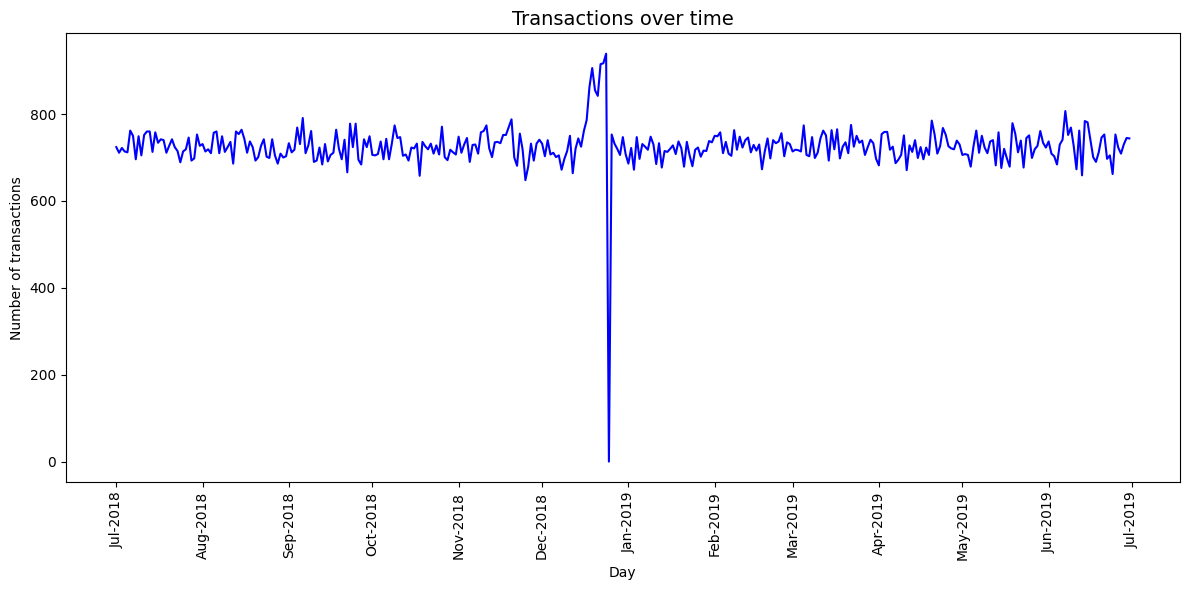

In [ ]:
# 2. Create a full sequence of dates
all_dates = pd.DataFrame({
    "Transaction_Date": pd.date_range(start="2018-07-01", end="2019-06-30", freq="D")
})

# 3. Count transactions per day
transactions_by_day = temp_df.groupby("Transaction_Date").size().reset_index(name="N")

# 4. Left join all_dates with transactions_by_day
transactions_by_day = all_dates.merge(transactions_by_day, on="Transaction_Date", how="left")

# 5. Fill missing counts with 0
transactions_by_day["N"] = transactions_by_day["N"].fillna(0)

# 6. Plot transactions over time
plt.figure(figsize=(12,6))
plt.plot(transactions_by_day["Transaction_Date"], transactions_by_day["N"], color="blue")

plt.title("Transactions over time", fontsize=14, ha="center")
plt.xlabel("Day")
plt.ylabel("Number of transactions")

# Format x-axis: monthly ticks
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%b-%Y"))

plt.tight_layout()
plt.show()

from the graph above we can clearlly see there is a stable sales across the period but a sudden rise in transaction followed by a drop in transaction between the end of 2018 which was restored before the begining of 2019

# graphical representation of transaction in the december season

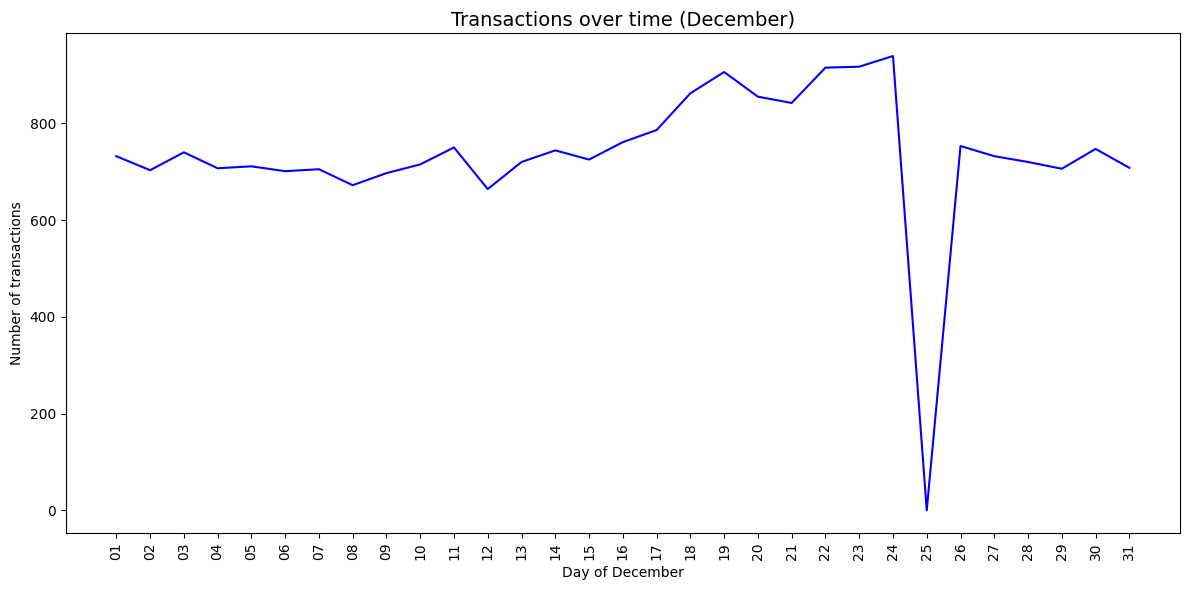

In [ ]:
# 1. Filter transactions to December only
december_data = transactions_by_day[transactions_by_day["Transaction_Date"].dt.month == 12]

# 2. Plot line graph
plt.figure(figsize=(12,6))
plt.plot(december_data["Transaction_Date"], december_data["N"], color="blue")

# 3. Labels and title
plt.title("Transactions over time (December)", fontsize=14, ha="center")
plt.xlabel("Day of December")
plt.ylabel("Number of transactions")

# 4. Show every day on x-axis
plt.xticks(december_data["Transaction_Date"], rotation=90)
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%d"))

plt.tight_layout()
plt.show()

# from the graph above i could tell with confidence that the abnormal hike and drop that occured earlier was recorded between december 24th and 26th

# create a new column PACK_SIZE by extracting digit from PROD_NAME

In [ ]:
# Create a new column PACK_SIZE by extracting digits from PROD_NAME
Data_DF['PACK_SIZE'] = Data_DF['Product_Description'].str.extract(r'(\d+)').astype(float)

# Quick check
print(Data_DF.head())

  Transaction_Date  Store_Number  Loyalty_Card_Number  Transaction_ID  \
0       2018-10-17             1                 1000               1   
1       2019-05-14             1                 1307             348   
2       2019-05-20             1                 1343             383   
3       2018-08-17             2                 2373             974   
4       2018-08-18             2                 2426            1038   

   Product_Number                       Product_Description  Sales_Quantity  \
0               5    Natural Chip        Compny SeaSalt175g               2   
1              66                  CCs Nacho Cheese    175g               2   
2              61    Smiths Crinkle Cut  Chips Chicken 170g               2   
3              69     Smiths Chip Thinly  SCream&Onion 175g               2   
4             108  Kettle Tortilla ChpsHny&Jlpno Chili 150g               2   

   Total_Sales  unit_price                   Production_Description  \
0          6.0 

In [ ]:
Data_DF.drop(columns='Production_Description', inplace=True)

In [ ]:
Data_DF['PACK_SIZE'].value_counts()

,count
PACK_SIZE,
175.0,66389
150.0,43131
134.0,25102
110.0,22387
170.0,19983
165.0,15297
300.0,15166
330.0,12540
380.0,6418


In [ ]:
Data_DF['Product_Description'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  SCream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'Ke

In [ ]:
# Count transactions by pack size
pack_size_counts = (
    Data_DF.groupby("PACK_SIZE")
    .size()
    .reset_index(name="count")
    .sort_values("PACK_SIZE")
)

print(pack_size_counts.head(20))

    PACK_SIZE  count
0        70.0   1507
1        90.0   3008
2       110.0  22387
3       125.0   1454
4       134.0  25102
5       135.0   3257
6       150.0  43131
7       160.0   2970
8       165.0  15297
9       170.0  19983
10      175.0  66389
11      180.0   1468
12      190.0   2995
13      200.0   4473
14      210.0   6272
15      220.0   1564
16      250.0   3169
17      270.0   6285
18      300.0  15166
19      330.0  12540


In [ ]:
Data_DF

,Transaction_Date,Store_Number,Loyalty_Card_Number,Transaction_ID,Product_Number,Product_Description,Sales_Quantity,Total_Sales,unit_price,Transaction_Month,Transaction_Weekday,Hours_Of_Day,PACK_SIZE
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.00,October,Wednesday,0,175.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,2,6.3,2.10,May,Tuesday,0,175.0
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1.45,May,Monday,0,170.0
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCream&Onion 175g,2,14.9,3.00,August,Friday,0,175.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,13.8,4.60,August,Saturday,0,150.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,5.40,March,Saturday,0,175.0
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,2,4.4,4.40,August,Monday,0,175.0
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,4.40,November,Tuesday,0,170.0
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,3.90,December,Thursday,0,150.0


# graphic representation of various pack sizes bought over time

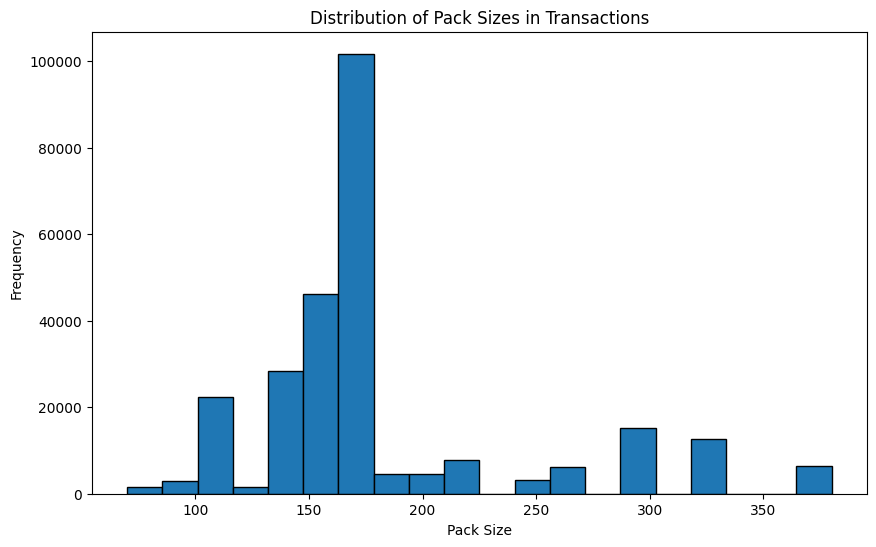

In [ ]:
#Histogram Showing The Various Pack Sizes Bought Over Time
plt.figure(figsize=(10,6))
plt.hist(Data_DF["PACK_SIZE"], bins=20, edgecolor="black")
plt.xlabel("Pack Size")
plt.ylabel("Frequency")
plt.title("Distribution of Pack Sizes in Transactions")
plt.show()


FROM THE GRAPH ABOVE I COULD STATE THAT THE 5 BEST PACK SIZE SALES LIES BETWEEN 110g and 175g. with 175 been the peak salesTHE CREATED PACK SIZE LOOK REASONABLE

i  extract brand by the first word in the PROD_NAME columns

In [ ]:
# Extract brand as substring before first space and make uppercase
Data_DF["BRAND"] = Data_DF["Product_Description"].str.split().str[0]

print(Data_DF[["Product_Description", "BRAND"]].head())

                        Product_Description    BRAND
0    Natural Chip        Compny SeaSalt175g  Natural
1                  CCs Nacho Cheese    175g      CCs
2    Smiths Crinkle Cut  Chips Chicken 170g   Smiths
3     Smiths Chip Thinly  SCream&Onion 175g   Smiths
4  Kettle Tortilla ChpsHny&Jlpno Chili 150g   Kettle


In [ ]:
Data_DF['BRAND'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'Woolworths', 'French', 'RRD', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

In [ ]:
Correct_Brand = {
    "RRD": "RED",
   "SNBTS" : "SUNBITES",
  "INFZNS" :   "INFUZIONS",
    "WW": "WOOLWORTHS",
    "SMITH": "SMITH",
    "NCC": "NATURAL",
    "DORITOS": "DORITOS",
   "GRNWVES" : "GRAIN"
}

# Standardize brand column: convert to uppercase first for consistency
Data_DF["BRAND"] = Data_DF["BRAND"].str.upper()



# Replace based on mapping (all variations collapse into umbrella brand)
Data_DF["BRAND"] = Data_DF["BRAND"].replace(Correct_Brand)

In [ ]:
Data_DF['BRAND'].unique()

array(['NATURAL', 'CCS', 'SMITHS', 'KETTLE', 'OLD', 'GRAIN', 'DORITOS',
       'TWISTIES', 'WOOLWORTHS', 'THINS', 'BURGER', 'CHEEZELS',
       'INFUZIONS', 'RED', 'PRINGLES', 'DORITO', 'SMITH', 'TYRRELLS',
       'COBS', 'FRENCH', 'TOSTITOS', 'CHEETOS', 'SUNBITES'], dtype=object)

In [ ]:
Data_DF['BRAND'].value_counts()

,count
BRAND,
KETTLE,41288
SMITHS,28859
PRINGLES,25102
DORITOS,24962
RED,17779
WOOLWORTHS,14757
INFUZIONS,14201
THINS,14075
COBS,9693


In [ ]:
Data_DF.columns

Index(['Transaction_Date', 'Store_Number', 'Loyalty_Card_Number',
       'Transaction_ID', 'Product_Number', 'Product_Description',
       'Sales_Quantity', 'Total_Sales', 'unit_price', 'Transaction_Month',
       'Transaction_Weekday', 'Hours_Of_Day', 'PACK_SIZE', 'BRAND'],
      dtype='object')

In [ ]:
Data_DF.head()

,Transaction_Date,Store_Number,Loyalty_Card_Number,Transaction_ID,Product_Number,Product_Description,Sales_Quantity,Total_Sales,unit_price,Transaction_Month,Transaction_Weekday,Hours_Of_Day,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.00,October,Wednesday,0,175.0,NATURAL
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,2,6.3,2.10,May,Tuesday,0,175.0,CCS
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1.45,May,Monday,0,170.0,SMITHS
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCream&Onion 175g,2,14.9,3.00,August,Friday,0,175.0,SMITHS
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,13.8,4.60,August,Saturday,0,150.0,KETTLE


In [ ]:
#load the CustomerData
Customer_Data = pd.read_csv("/content/QVI_purchase_behaviour (4).csv")
Customer_Data

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [ ]:
Data_DF.columns

Index(['Transaction_Date', 'Store_Number', 'Loyalty_Card_Number',
       'Transaction_ID', 'Product_Number', 'Product_Description',
       'Sales_Quantity', 'Total_Sales', 'unit_price', 'Transaction_Month',
       'Transaction_Weekday', 'Hours_Of_Day', 'PACK_SIZE', 'BRAND'],
      dtype='object')

In [ ]:
Customer_Data.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [ ]:
Customer_Data = Customer_Data.rename(columns={'LYLTY_CARD_NBR': 'Loyalty_Card_Number'})

In [ ]:
# Rename the column
Customer_Data = Customer_Data.rename(columns={'loyalty_card_number': 'Loyalty_Card_Number'})

In [ ]:
# check for missing value
Customer_Data.isnull().sum()

,0
Loyalty_Card_Number,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0


In [ ]:
# check for duplicate
Customer_Data.duplicated().sum()

np.int64(0)

# summary of the Customer Data

In [ ]:
Customer_Data.describe()

,Loyalty_Card_Number
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


# merging the customer and the transaction data

In [ ]:
# Merge Transaction_Data_no_salsa with Customer_Data
merged_Data = pd.merge(
    Data_DF,
    Customer_Data,
    how='left',         # keep all rows from transactionData
    on='Loyalty_Card_Number'    # replace with your actual join key
)

# Replace NaN with defaults: "Unknown" for strings, 0 for numbers
for col in merged_Data.columns:
    if merged_Data[col].dtype == 'object':   # text/string columns
        merged_Data[col] = merged_Data[col].fillna("Unknown")
    else:                               # numeric columns
        merged_Data[col] = merged_Data[col].fillna(0)

print("Number of rows in merged_Data dataset:", len(merged_Data))
print("Number of rows in Transation_Data_no_salsa:", len(Data_DF))

Number of rows in merged_Data dataset: 264835
Number of rows in Transation_Data_no_salsa: 264835


In [ ]:
merged_Data.duplicated().sum()

np.int64(0)

In [ ]:
pip install squarify

sales aggregation by LIFESTAGE AND PREMIUM_CUSTOMER

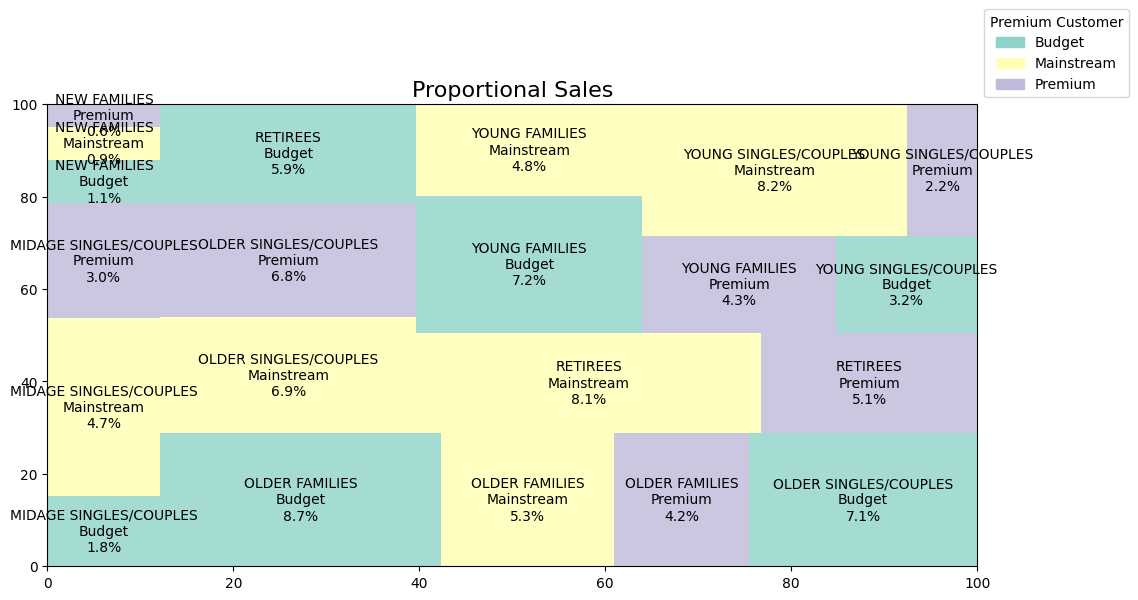

In [ ]:
import squarify

# ---- Step 1: Aggregate sales ----
sales = (
    merged_Data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'], as_index=False)
        .agg(SALES=('Total_Sales', 'sum'))
)

# ---- Step 2: Compute proportions ----
total_sales = sales['SALES'].sum()
sales['PCT'] = (sales['SALES'] / total_sales * 100).round(1)

# ---- Step 3: Define colors for Premium Customer ----
premium_categories = sales['PREMIUM_CUSTOMER'].unique()
color_map = dict(zip(premium_categories, plt.cm.Set3.colors[:len(premium_categories)]))
sales['color'] = sales['PREMIUM_CUSTOMER'].map(color_map)

# ---- Step 4: Create labels ----
sales['label'] = sales.apply(
    lambda x: f"{x['LIFESTAGE']}\n{x['PREMIUM_CUSTOMER']}\n{x['PCT']}%",
    axis=1
)

# ---- Step 5: Plot Squarify Treemap ----
plt.figure(figsize=(12, 6))
squarify.plot(
    sizes=sales['SALES'],
    label=sales['label'],
    color=sales['color'],
    alpha=0.8
)

plt.title("Proportional Sales", fontsize=16)

# ---- Step 6: Add legend for Premium Customer ----
handles = [plt.Rectangle((0,0),1,1, color=color_map[cat]) for cat in premium_categories]
plt.legend(handles, premium_categories, title='Premium Customer', bbox_to_anchor=(1, 1))

plt.axis('on')  # remove axes for treemap
plt.show()

from the graph above i could say that when it come to mainstream their highest sales is coming from young single/ couple, on the budget category old families led in sales while the premium was led by old singles/ couples. across the period the new families performed poorly in terms of sales

Aggregate number of unique customers

In [ ]:
merged_Data.columns

Index(['Transaction_Date', 'Store_Number', 'Loyalty_Card_Number',
       'Transaction_ID', 'Product_Number', 'Product_Description',
       'Sales_Quantity', 'Total_Sales', 'unit_price', 'Transaction_Month',
       'Transaction_Weekday', 'Hours_Of_Day', 'PACK_SIZE', 'BRAND',
       'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

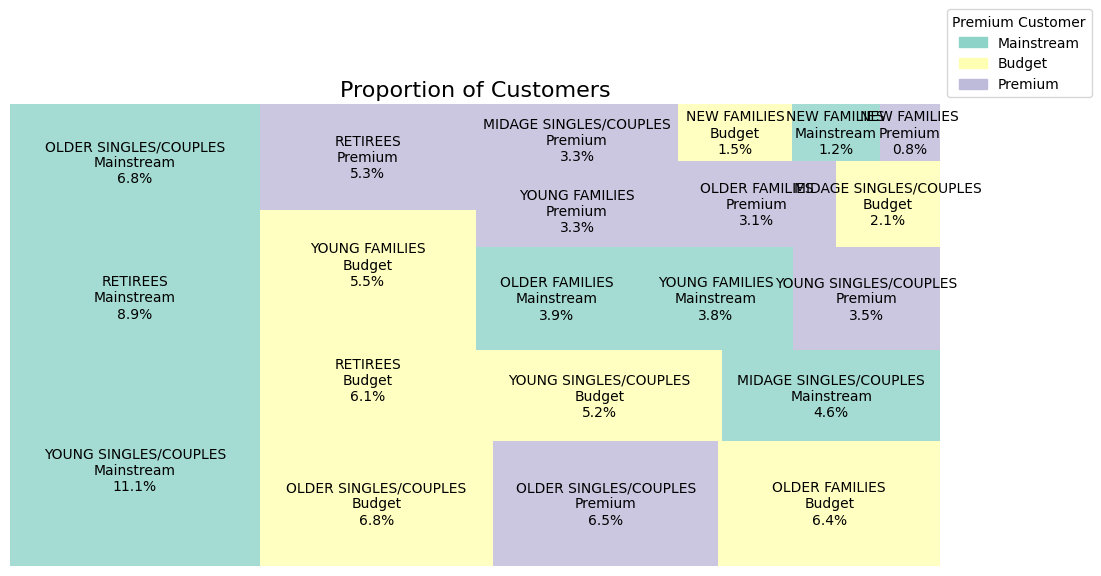

In [ ]:


customers = (
    merged_Data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'], as_index=False)
        .agg(CUSTOMERS=('Loyalty_Card_Number', 'nunique'))
)

# ---- Step 2: Sort descending by number of customers ----
customers = customers.sort_values('CUSTOMERS', ascending=False)

# ---- Step 3: Compute percentages ----
total_customers = customers['CUSTOMERS'].sum()
customers['PCT'] = (customers['CUSTOMERS'] / total_customers * 100).round(1)

# ---- Step 4: Define colors for Premium Customer ----
premium_categories = customers['PREMIUM_CUSTOMER'].unique()
color_map = dict(zip(premium_categories, plt.cm.Set3.colors[:len(premium_categories)]))
customers['color'] = customers['PREMIUM_CUSTOMER'].map(color_map)

# ---- Step 5: Create labels with percentages ----
customers['label'] = customers.apply(
    lambda x: f"{x['LIFESTAGE']}\n{x['PREMIUM_CUSTOMER']}\n{x['PCT']}%",
    axis=1
)

# ---- Step 6: Plot Squarify Treemap ----
plt.figure(figsize=(12, 6))
squarify.plot(
    sizes=customers['CUSTOMERS'],
    label=customers['label'],
    color=customers['color'],
    alpha=0.8
)

plt.title("Proportion of Customers", fontsize=16)

# ---- Step 7: Add legend for Premium Customer ----
handles = [plt.Rectangle((0,0),1,1, color=color_map[cat]) for cat in premium_categories]
plt.legend(handles, premium_categories, title='Premium Customer', bbox_to_anchor=(1, 1))

plt.axis('off')  # remove axes for treemap
plt.show()

calculate average units per customer by LIFESTAGE and PREMIUM_CUSTOMER

In [ ]:
merged_Data.columns

Index(['Transaction_Date', 'Store_Number', 'Loyalty_Card_Number',
       'Transaction_ID', 'Product_Number', 'Product_Description',
       'Sales_Quantity', 'Total_Sales', 'unit_price', 'Transaction_Month',
       'Transaction_Weekday', 'Hours_Of_Day', 'PACK_SIZE', 'BRAND',
       'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

/tmp/ipython-input-2864635202.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x["Sales_Quantity"].sum() / x["Loyalty_Card_Number"].nunique())


         LIFESTAGE PREMIUM_CUSTOMER        AVG
7   OLDER FAMILIES       Mainstream  10.062875
6   OLDER FAMILIES           Budget   9.908021
8   OLDER FAMILIES          Premium   9.843448
15  YOUNG FAMILIES           Budget   9.520538
17  YOUNG FAMILIES          Premium   9.505138


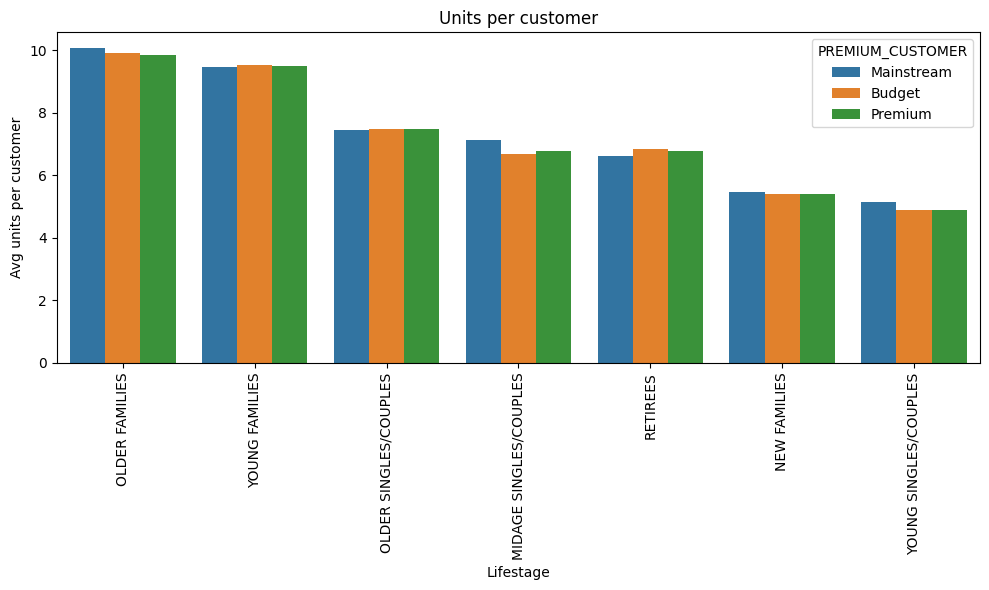

In [ ]:
# Calculate average units per customer by LIFESTAGE and PREMIUM_CUSTOMER
avg_units = (
    merged_Data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])
        .apply(lambda x: x["Sales_Quantity"].sum() / x["Loyalty_Card_Number"].nunique())
        .reset_index(name="AVG")
        .sort_values("AVG", ascending=False)
)

print(avg_units.head())  # show result table

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_units,
    x="LIFESTAGE",
    y="AVG",
    hue="PREMIUM_CUSTOMER",
    dodge=True
)

plt.xlabel("Lifestage")
plt.ylabel("Avg units per customer")
plt.title("Units per customer")
plt.xticks(rotation=90, va="top")
plt.tight_layout()
plt.show()

In [ ]:
merged_Data.columns

Index(['Transaction_Date', 'Store_Number', 'Loyalty_Card_Number',
       'Transaction_ID', 'Product_Number', 'Product_Description',
       'Sales_Quantity', 'Total_Sales', 'unit_price', 'Transaction_Month',
       'Transaction_Weekday', 'Hours_Of_Day', 'PACK_SIZE', 'BRAND',
       'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

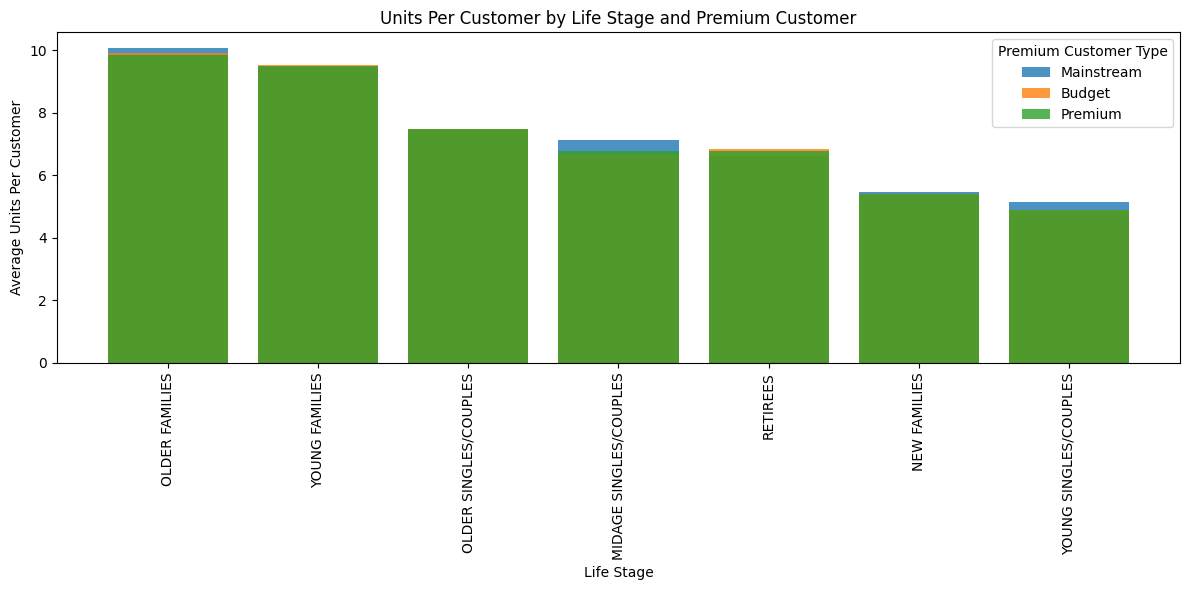

In [ ]:
# -------------------------------
# 1. Calculate Units per Customer by Lifestage & Premium_Customer
# -------------------------------
avg_units = (
    merged_Data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])
    .agg(
        TOTAL_UNITS=("Sales_Quantity", "sum"),
        UNIQUE_CUSTOMERS=("Loyalty_Card_Number", "nunique")
    )
    .reset_index()
)

# Average units per customer
avg_units["AVG"] = avg_units["TOTAL_UNITS"] / avg_units["UNIQUE_CUSTOMERS"]

# Order by AVG (like R's order(-AVG))
avg_units = avg_units.sort_values(by="AVG", ascending=False)

#print("Average Units per Customer by Life Stage and Premium Customer:")
#print(avg_units)

# -------------------------------
# 2. Construct Bar Chart
# -------------------------------
plt.figure(figsize=(12, 6))

# Bar chart with dodged grouping (Lifestage on X, Premium/Budget/Mainstream as fill)
for premium_type in avg_units["PREMIUM_CUSTOMER"].unique():
    subset = avg_units[avg_units["PREMIUM_CUSTOMER"] == premium_type]
    plt.bar(
        subset["LIFESTAGE"],
        subset["AVG"],
        label=premium_type,
        alpha=0.8
    )

plt.xlabel("Life Stage")
plt.ylabel("Average Units Per Customer")
plt.title("Units Per Customer by Life Stage and Premium Customer")
plt.xticks(rotation=90)
plt.legend(title="Premium Customer Type")
plt.tight_layout()
plt.show()

calculate average price per unit

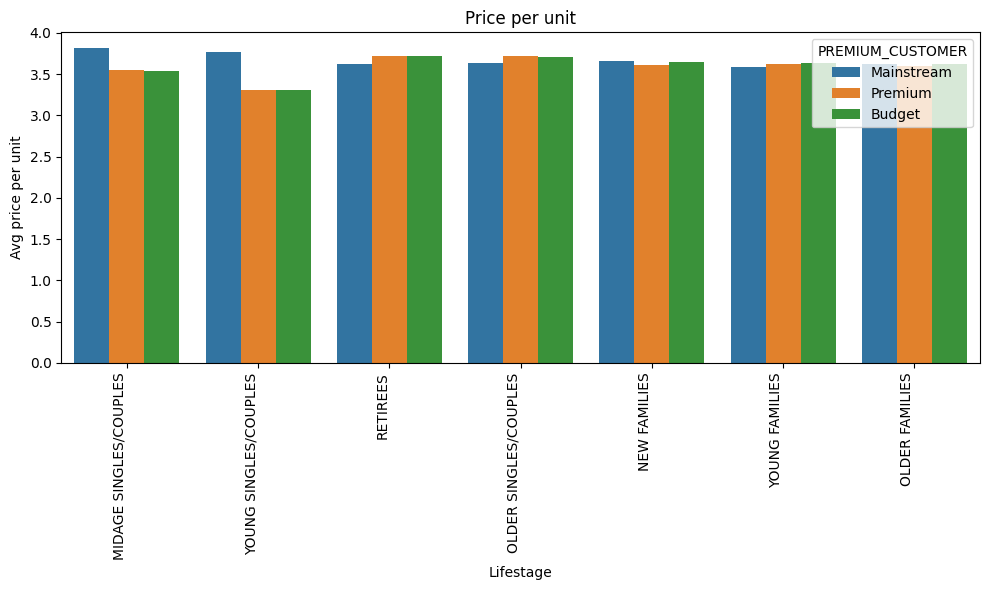

In [ ]:

# Step 1: Compute average price per unit
avg_price = (
    merged_Data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])
        .agg(AVG=('Total_Sales', lambda x: x.sum() / merged_Data.loc[x.index, 'Sales_Quantity'].sum()))
        .reset_index()
        .sort_values('AVG', ascending=False)
)

# Step 2: Create a bar plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_price,
    x='LIFESTAGE',
    y='AVG',
    hue='PREMIUM_CUSTOMER',
    dodge=True
)

# Step 3: Add labels and rotate x-axis labels
plt.xlabel("Lifestage")
plt.ylabel("Avg price per unit")
plt.title("Price per unit")
plt.xticks(rotation=90, ha='right')
plt.tight_layout()

# Step 4: Show the plot
plt.show()

Mainstream middle-aged and young singles and couples are more willing to pay a higher price per packet of chips compared to their budget and premium counterparts. This may be because premium shoppers tend to prefer healthier snacks, and when they do buy chips, it is usually for entertainment purposes rather than personal consumption. This is further supported by the observation that fewer premium middle-aged and young singles and couples purchase chips compared to their mainstream counterparts.

In [ ]:
# Code a correlation matrix to help determine most correlated variables
Data_DF.corr(numeric_only=True)

,Store_Number,Loyalty_Card_Number,Transaction_ID,Product_Number,Sales_Quantity,Total_Sales,unit_price,Hours_Of_Day,PACK_SIZE
Store_Number,1.000000,0.950869,0.997593,0.002309,NaN,0.001567,-0.001062,NaN,0.000286
Loyalty_Card_Number,0.950869,1.000000,0.954919,0.001755,NaN,0.001305,0.000139,NaN,0.000739
Transaction_ID,0.997593,0.954919,1.000000,0.002544,NaN,0.001906,-0.000759,NaN,0.000262
Product_Number,0.002309,0.001755,0.002544,1.000000,NaN,-0.162870,-0.190047,NaN,-0.230455
Sales_Quantity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total_Sales,0.001567,0.001305,0.001906,-0.162870,NaN,1.000000,0.862029,NaN,0.374673
unit_price,-0.001062,0.000139,-0.000759,-0.190047,NaN,0.862029,1.000000,NaN,0.438736
Hours_Of_Day,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PACK_SIZE,0.000286,0.000739,0.000262,-0.230455,NaN,0.374673,0.438736,NaN,1.000000


In [ ]:
from scipy.stats import ttest_ind

# Step 1: Compute price per unit
merged_Data['price'] = merged_Data['Total_Sales'] / merged_Data['Sales_Quantity']

# Step 2: Filter the relevant rows
lifestages = ["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"]
filtered_data = merged_Data[merged_Data['LIFESTAGE'].isin(lifestages)]

# Step 3: Separate the two groups
group_mainstream = filtered_data[filtered_data['PREMIUM_CUSTOMER'] == "Mainstream"]['price']
group_non_mainstream = filtered_data[filtered_data['PREMIUM_CUSTOMER'] != "Mainstream"]['price']

# Step 4: Perform a one-sided t-test (greater)
t_stat, p_value_two_sided = ttest_ind(group_mainstream, group_non_mainstream, equal_var=False)

# Convert to one-sided p-value (greater)
if t_stat > 0:
    p_value_one_sided = p_value_two_sided / 2
else:
    p_value_one_sided = 1 - (p_value_two_sided / 2)

print("T-statistic:", t_stat)
print("One-sided p-value (Mainstream > Non-Mainstream):", p_value_one_sided)

T-statistic: 36.36749199411882
One-sided p-value (Mainstream > Non-Mainstream): 1.021924554224959e-286


In [ ]:
import pandas as pd

# Step 1: Subset the data
segment1 = merged_Data[(merged_Data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (merged_Data['PREMIUM_CUSTOMER'] == "Mainstream")]
other = merged_Data[~((merged_Data['LIFESTAGE'] == "YOUNG SINGLES/COUPLES") & (merged_Data['PREMIUM_CUSTOMER'] == "Mainstream"))]

# Step 2: Compute total quantity for each group
quantity_segment1 = segment1['Sales_Quantity'].sum()
quantity_other = other['Sales_Quantity'].sum()

# Step 3: Compute brand-level proportions
quantity_segment1_by_brand = (
    segment1.groupby('BRAND')['Sales_Quantity']
            .sum()
            .reset_index(name='targetSegment')
)
quantity_segment1_by_brand['targetSegment'] /= quantity_segment1

quantity_other_by_brand = (
    other.groupby('BRAND')['Sales_Quantity']
         .sum()
         .reset_index(name='other')
)
quantity_other_by_brand['other'] /= quantity_other

# Step 4: Merge and calculate brand affinity
brand_proportions = pd.merge(quantity_segment1_by_brand, quantity_other_by_brand, on='BRAND')
brand_proportions['affinityToBrand'] = brand_proportions['targetSegment'] / brand_proportions['other']

# Step 5: Sort by descending affinity
brand_proportions = brand_proportions.sort_values('affinityToBrand', ascending=False).reset_index(drop=True)

print(brand_proportions)

         BRAND  targetSegment     other  affinityToBrand
0     TYRRELLS       0.029683  0.023867         1.243685
1     TWISTIES       0.043157  0.035060         1.230949
2       DORITO       0.014530  0.011812         1.230029
3     TOSTITOS       0.042678  0.035171         1.213441
4       KETTLE       0.184329  0.153471         1.201069
5          OLD       0.041575  0.034663         1.199415
6     PRINGLES       0.111010  0.093397         1.188586
7      DORITOS       0.107318  0.093138         1.152237
8         COBS       0.041431  0.036187         1.144903
9    INFUZIONS       0.059941  0.053082         1.129206
10       GRAIN       0.030977  0.029076         1.065388
11       THINS       0.055913  0.052910         1.056751
12    CHEEZELS       0.016592  0.017448         0.950909
13      SMITHS       0.089048  0.110673         0.804605
14     CHEETOS       0.007960  0.011316         0.703410
15      FRENCH       0.003740  0.005492         0.681015
16         RED       0.046466  

In [ ]:
# Step 1: Compute pack-level proportions
quantity_segment1_by_pack = (
    segment1.groupby('PACK_SIZE')['Sales_Quantity']
            .sum()
            .reset_index(name='targetSegment')
)
quantity_segment1_by_pack['targetSegment'] /= quantity_segment1

quantity_other_by_pack = (
    other.groupby('PACK_SIZE')['Sales_Quantity']
         .sum()
         .reset_index(name='other')
)
quantity_other_by_pack['other'] /= quantity_other

# Step 2: Merge and calculate pack affinity
pack_proportions = pd.merge(quantity_segment1_by_pack, quantity_other_by_pack, on='PACK_SIZE')
pack_proportions['affinityToPack'] = pack_proportions['targetSegment'] / pack_proportions['other']

# Step 3: Sort by descending affinity
pack_proportions = pack_proportions.sort_values('affinityToPack', ascending=False).reset_index(drop=True)

print(pack_proportions)


    PACK_SIZE  targetSegment     other  affinityToPack
0       270.0       0.029731  0.023219        1.280438
1       380.0       0.030018  0.023740        1.264481
2       330.0       0.057303  0.046500        1.232339
3       134.0       0.111010  0.093397        1.188586
4       210.0       0.027621  0.023346        1.183094
5       110.0       0.098350  0.083351        1.179959
6       135.0       0.013906  0.012161        1.143529
7       250.0       0.013427  0.011841        1.133906
8       170.0       0.075525  0.075448        1.001015
9       300.0       0.055097  0.057451        0.959029
10      175.0       0.239618  0.251626        0.952279
11      150.0       0.155414  0.163496        0.950565
12      165.0       0.052844  0.058181        0.908266
13      190.0       0.007097  0.011669        0.608192
14      180.0       0.003357  0.005730        0.585811
15      160.0       0.006138  0.011648        0.526930
16       90.0       0.006138  0.011804        0.519977
17       7

Analysis of Chip Purchases by Segment and Pack Size

When examining the 270g pack size, only Twisties offers products in this size:

Twisties Cheese 270g

Twisties Chicken 270g

This suggests that higher purchases in this pack size may reflect a preference for Twisties rather than a general trend across brands.

Conclusion

Key Shoppers:

Budget older families

Mainstream young singles/couples

Mainstream retirees

High Spend Drivers:

Mainstream young singles/couples and retirees contribute most to sales due to their larger numbers.

Mainstream middle-aged and young singles/couples are also willing to pay more per packet, indicating impulse-buying behavior.

Brand Insights:

Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips than the rest of the population.

Recommendations for the Category Manager:

Consider off-locating Tyrrells and smaller chip packs in discretionary spaces frequented by young singles/couples to increase visibility and encourage impulse purchases.

Quantium can assist in identifying where these segments are most present and in measuring the impact of the placement changes.


In [ ]:
  merged_Data

,Transaction_Date,Store_Number,Loyalty_Card_Number,Transaction_ID,Product_Number,Product_Description,Sales_Quantity,Total_Sales,unit_price,Transaction_Month,Transaction_Weekday,Hours_Of_Day,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,price
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,3.00,October,Wednesday,0,175.0,NATURAL,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,2,6.3,2.10,May,Tuesday,0,175.0,CCS,MIDAGE SINGLES/COUPLES,Budget,3.15
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,1.45,May,Monday,0,170.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly SCream&Onion 175g,2,14.9,3.00,August,Friday,0,175.0,SMITHS,MIDAGE SINGLES/COUPLES,Budget,7.45
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,13.8,4.60,August,Saturday,0,150.0,KETTLE,MIDAGE SINGLES/COUPLES,Budget,6.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264830,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,5.40,March,Saturday,0,175.0,KETTLE,YOUNG SINGLES/COUPLES,Premium,5.40
264831,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,2,4.4,4.40,August,Monday,0,175.0,TOSTITOS,YOUNG SINGLES/COUPLES,Premium,2.20
264832,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,4.40,November,Tuesday,0,170.0,DORITOS,YOUNG SINGLES/COUPLES,Premium,4.40
264833,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,3.90,December,Thursday,0,150.0,DORITOS,YOUNG SINGLES/COUPLES,Premium,3.90


In [ ]:
merged_Data.columns

Index(['Transaction_Date', 'Store_Number', 'Loyalty_Card_Number',
       'Transaction_ID', 'Product_Number', 'Product_Description',
       'Sales_Quantity', 'Total_Sales', 'unit_price', 'Transaction_Month',
       'Transaction_Weekday', 'Hours_Of_Day', 'PACK_SIZE', 'BRAND',
       'LIFESTAGE', 'PREMIUM_CUSTOMER', 'price'],
      dtype='object')

In [ ]:
# Step 3: Group sales by store
# Replace 'Store' with the column name for store, and 'Sales' with sales column name
sales_by_store = merged_Data.groupby('Store_Number')['Total_Sales'].sum().reset_index()

# Step 4: Sort stores by total sales (optional)
sales_by_store = sales_by_store.sort_values(by='Total_Sales', ascending=False)
sales_by_store.head(20)

,Store_Number,Total_Sales
225,226,17603.45
87,88,16312.35
164,165,15935.85
39,40,15544.20
236,237,15522.40
57,58,15232.65
198,199,14777.00
3,4,14644.85
202,203,14534.70
25,26,14452.70


In [ ]:
merged_Data.drop(columns=['price'], inplace=True)

In [ ]:
from google.colab import files

# Save the DataFrame to a CSV file in the Colab environment first
output_filename = 'merged_data.csv'
merged_Data.to_csv(output_filename, index=False)

# Now download the saved file
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 1. Calculate Average Transaction Value (ATV)
ATV = merged_Data['Total_Sales'].mean()

# 2. Calculate Average Purchase Frequency (APF)
# Total number of unique transactions
total_transactions = merged_Data['Transaction_ID'].nunique()
# Total number of unique customers
total_customers = merged_Data['Loyalty_Card_Number'].nunique()
# Average number of transactions per customer
APF = total_transactions / total_customers

# 3. Define Customer Lifespan (Assumed: 3 years, 1095 days)
CUSTOMER_LIFESPAN_YEARS = 3


In [ ]:

# 4. Calculate CLV (ATV * APF * Lifespan)
# This represents the expected sales generated by an average customer over 3 years.
CLV_USD = ATV * (APF * (365 / merged_Data['Transaction_Date'].nunique())) * (CUSTOMER_LIFESPAN_YEARS * 365)
# Note: A more precise way is to use the existing APF for the observation period (506 days)
observation_days = (merged_Data['Transaction_Date'].max() - merged_Data['Transaction_Date'].min()).days
APF_per_day = APF / observation_days
CLV_SIMPLE = ATV * APF_per_day * (CUSTOMER_LIFESPAN_YEARS * 365)

In [ ]:
from datetime import timedelta
# --- B. Simple Retention Rate Analysis ---

# 1. Define Cohorts (e.g., First 90 days vs. Last 90 days)
first_date = merged_Data['Transaction_Date'].min()
date_threshold = first_date + timedelta(days=90)

# 2. Identify Baseline Cohort (Purchased in the first 90 days)
baseline_customers = merged_Data[merged_Data['Transaction_Date'] <= date_threshold]['Loyalty_Card_Number'].unique()

# 3. Identify Retained Customers (Customers from the baseline who purchased in the final 90 days)
last_date = merged_Data['Transaction_Date'].max()
final_date_threshold = last_date - timedelta(days=90)
retained_customers_df = merged_Data[(merged_Data['Loyalty_Card_Number'].isin(baseline_customers)) &
                           (merged_Data['Transaction_Date'] >= final_date_threshold)]
retained_customers = retained_customers_df['Loyalty_Card_Number'].unique()

# 4. Calculate Retention Rate
retention_rate = len(retained_customers) / len(baseline_customers)

# --- C. Output Results ---
results = {
    "Average Transaction Value (ATV)": ATV,
    "Average Purchase Frequency (APF) per Customer (Over Entire Period)": APF,
    "Calculated Simple CLV (3-Year Lifespan)": CLV_SIMPLE,
    "Baseline Customer Cohort Size (First 90 Days)": len(baseline_customers),
    "Retained Customer Size (Purchased Again in Last 90 Days)": len(retained_customers),
    "Simple Retention Rate": retention_rate
}

# Convert results to a DataFrame for clean output
clv_retention_df = pd.DataFrame(list(results.items()), columns=['Metric', 'Value'])

print("\n--- Customer Lifetime Value (CLV) & Retention Analysis ---")
print(clv_retention_df)


--- Customer Lifetime Value (CLV) & Retention Analysis ---
                                              Metric         Value
0                    Average Transaction Value (ATV)      7.288928
1  Average Purchase Frequency (APF) per Customer ...      3.622493
2            Calculated Simple CLV (3-Year Lifespan)     79.429877
3      Baseline Customer Cohort Size (First 90 Days)  40733.000000
4  Retained Customer Size (Purchased Again in Las...  23876.000000
5                              Simple Retention Rate      0.586159


In [ ]:
merged_Data.dtypes

,0
Transaction_Date,datetime64[ns]
Store_Number,int64
Loyalty_Card_Number,int64
Transaction_ID,int64
Product_Number,int64
Product_Description,object
Sales_Quantity,int64
Total_Sales,float64
unit_price,float64
Transaction_Month,object


In [ ]:
merged_Data.columns

Index(['Transaction_Date', 'Store_Number', 'Loyalty_Card_Number',
       'Transaction_ID', 'Product_Number', 'Product_Description',
       'Sales_Quantity', 'Total_Sales', 'unit_price', 'Transaction_Month',
       'Transaction_Weekday', 'Hours_Of_Day', 'PACK_SIZE', 'BRAND',
       'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

In [ ]:
# 2. Convert the 'ID' column from integer to object (string/text)
# 'object' is the pandas data type used to store strings (text).
merged_Data['Store_Number'] = merged_Data['Store_Number'].astype(str)
merged_Data['Loyalty_Card_Number'] = merged_Data['Loyalty_Card_Number'].astype(str)
merged_Data['Product_Number'] = merged_Data['Product_Number'].astype(str)
merged_Data['Transaction_ID'] = merged_Data['Transaction_ID'].astype(str)


In [ ]:
from google.colab import files

# Save the DataFrame to a CSV file in the Colab environment first
output_filename = 'merged_data.csv6'
merged_Data.to_csv(output_filename, index=False)

# Now download the saved file
files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
merged_Data.columns

Index(['Transaction_Date', 'Store_Number', 'Loyalty_Card_Number',
       'Transaction_ID', 'Product_Number', 'Product_Description',
       'Sales_Quantity', 'Total_Sales', 'unit_price', 'Transaction_Month',
       'Transaction_Weekday', 'Hours_Of_Day', 'PACK_SIZE', 'BRAND',
       'LIFESTAGE', 'PREMIUM_CUSTOMER'],
      dtype='object')

In [ ]:
merged_Data.shape

(264835, 16)